In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
#importing desc function from sqlalchemy
from sqlalchemy import desc
#importing datetime function
import datetime as dt
#importing pandas
import pandas as pd

In [3]:
from flask import Flask, jsonify

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()


In [6]:
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table

#saving Station class
Station = Base.classes.station
#saving Measurment class
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
# creating a session query to find most recent date
recent_date_0 = session.query(Measurement.date).order_by(desc(Measurement.date)).first()
#displaying most recent date

recent_date = recent_date_0[0]
recent_date

'2017-08-23'

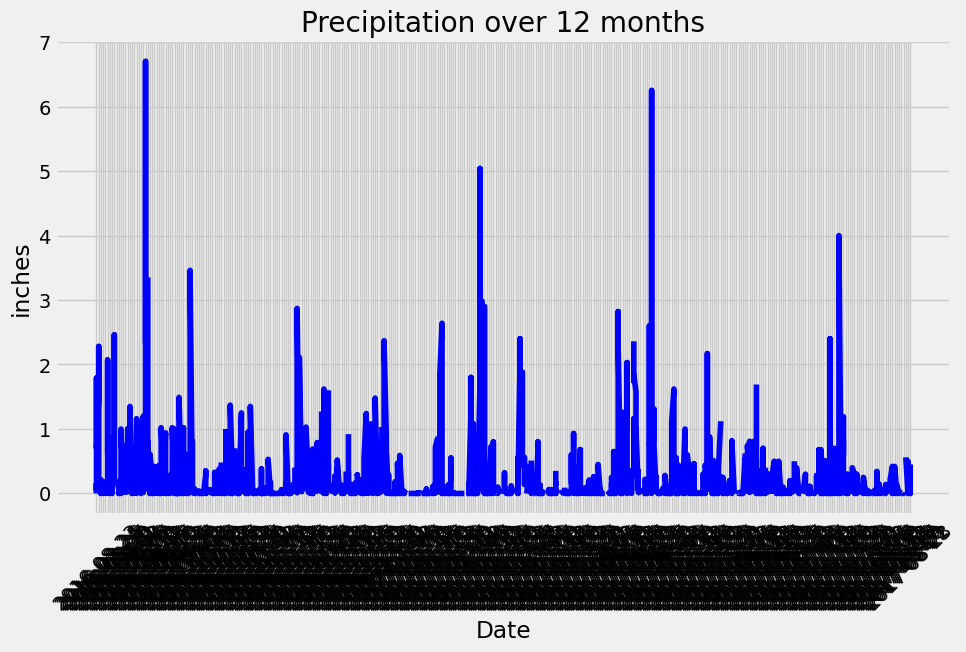

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

#converting the most recent date to a datetime object
recent_date = pd.to_datetime(recent_date)

#finding the date one year from the last date in data set.
date_one_year = (recent_date - dt.timedelta(days=365))

date_one_year_str = date_one_year.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores

#Creating a query to get data from  last 12 months and putting in ascending order 
precipitation_date_scores = (session.query(Measurement.date , Measurement.prcp).filter(Measurement.date >= date_one_year_str).order_by(Measurement.date).all())

# Save the query results as a Pandas DataFrame. Explicitly set the column names

#saving into data frame
prec_df = pd.DataFrame(precipitation_date_scores ,columns=["date" , "precipitation"] )

# Sort the dataframe by date
prec_df = prec_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data

#creating plot
plt.figure(figsize=(10, 6))
plt.plot(prec_df["date"], prec_df["precipitation"] , color="blue")


#lables and title
plt.xlabel("Date")
plt.ylabel("inches")
plt.title("Precipitation over 12 months")
plt.tight_layout()
plt.xticks(rotation=45)


#display the plot
plt.show()


In [36]:
# Use Pandas to calculate the summary statistics for the precipitation data
prec_stats = prec_df['precipitation'].describe()
print(prec_stats)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number of stations in the dataset
stations_total = session.query(func.count(Station.station.distinct())).scalar()
stations_total

9

In [46]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
#finding the most active station , joining both tables
most_active = session.query(Station.station,func.count(Station.station)) \
    .join(Measurement, Station.station == Measurement.station)\
    .group_by(Station.station) \
    .order_by(func.count(Station.station).desc()).all()
print(most_active)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


# Station id USC00519281 is the most active with 2772 observations

In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#getting the most active station
most_active_station = most_active[0][0]

#query to get the lowest, highest, and average temperature
temp = session.query(func.min(Measurement.tobs) , func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
print(temp)

[(54.0, 85.0, 71.66378066378067)]


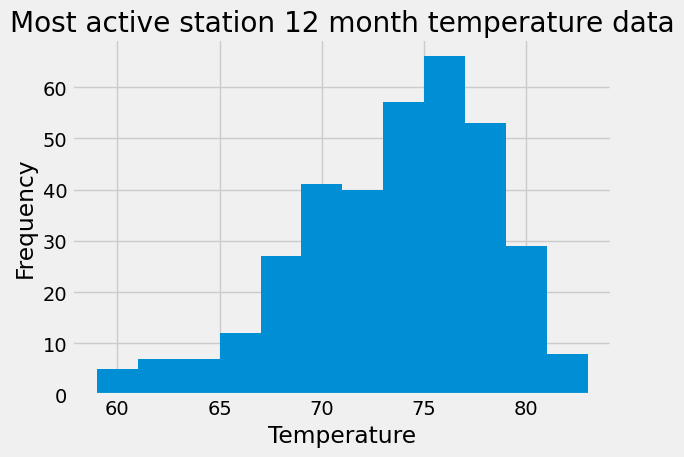

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#creating the query 
temps_most_active = session.query(Measurement.tobs).filter(Measurement.station == most_active_station, Measurement.date >= date_one_year_str).all()

#getting temp values from the tuple
temps_most_active_values = [temp_1[0] for temp_1 in temps_most_active]

#creating the histogram 
plt.hist(temps_most_active_values, bins=12  )
#lables 
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Most active station 12 month temperature data")
plt.tight_layout()
plt.show()


# Close Session

In [55]:
# Close Session
session.close()